## 9차 시도
-드롭아웃 0.3-0.3-0.5
- 옵티마이저 =아담
- learning_rate=0.001
- AveragePooling2D
- [2.2051594257354736, 0.4334000051021576]

In [ ]:
model9  =Sequential([
                   Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    AveragePooling2D(),
                    Dropout(0.3),
                    Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    AveragePooling2D(),
                    Dropout(0.3),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(100,activation='softmax')
])
model9.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_76 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 64)       0         
 ooling2D)                                                       
                                                                 
 dropout_48 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_77 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_78 (Conv2D)          (None, 13, 13, 128)       147584    
                                                     

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 4.1319 - accuracy: 0.0652
Epoch 1: val_loss improved from inf to 3.71931, saving model to best-cifar100-v9.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 4.1319 - accuracy: 0.0652 - val_loss: 3.7193 - val_accuracy: 0.1358
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 3.5414 - accuracy: 0.1583
Epoch 2: val_loss improved from 3.71931 to 3.18922, saving model to best-cifar100-v9.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.5414 - accuracy: 0.1583 - val_loss: 3.1892 - val_accuracy: 0.2292
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.2019 - accuracy: 0.2204
Epoch 3: val_loss improved from 3.18922 to 2.97955, saving model to best-cifar100-v9.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.2015 - accuracy: 0.2205 - val_loss: 2.9795 - val_accuracy: 0.2731
Epoch 4/100
1247/1250 [=====================

Text(0.5, 0, 'Epoch')

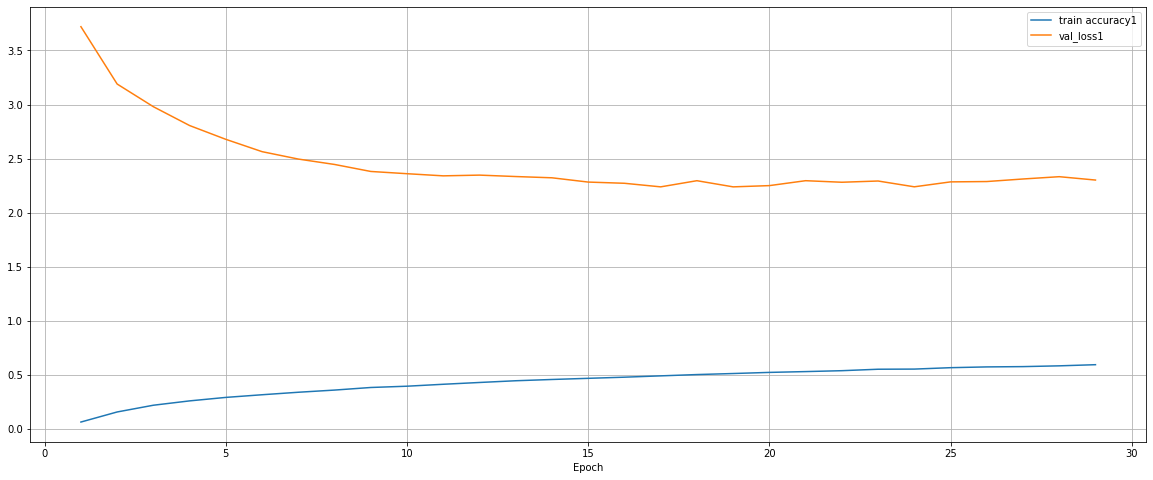

In [ ]:
from tensorflow.keras.optimizers import Adam
model9.compile(
    optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v9.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist9=model9.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist9.history['accuracy']
y_vloss=hist9.history['val_loss']
xs9=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs9,y_acc,label='train accuracy1')
plt.plot(xs9,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [ ]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.2052 - accuracy: 0.4334


[2.2051594257354736, 0.4334000051021576]